# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 8 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the housing dataset (housing.csv) and __inspect__!

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

In [140]:
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

3. __Add__ the additional Feature __"rooms_per_household"__ (should be self-explanatory)

4. __Add__ the additional Feature __"population_per_household"__ (should be self-explanatory)

5. __Add__ the additional Feature __"bedrooms_per_household"__ (should be self-explanatory)

In [141]:
df.dropna(inplace=True)

In [142]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [143]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['population_per_household'] = df['population']/df['households']
df['bedrooms_per_household'] = df['total_bedrooms']/df['households']

## Which Factors influence House Prices?

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

In [144]:
df.corr()['median_house_value'].sort_values()

latitude                   -0.144638
bedrooms_per_household     -0.046739
longitude                  -0.045398
population                 -0.025300
population_per_household   -0.023639
total_bedrooms              0.049686
households                  0.064894
housing_median_age          0.106432
total_rooms                 0.133294
rooms_per_household         0.151344
median_income               0.688355
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [145]:
#median_income is the most influencing feature

7. __Create__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis.

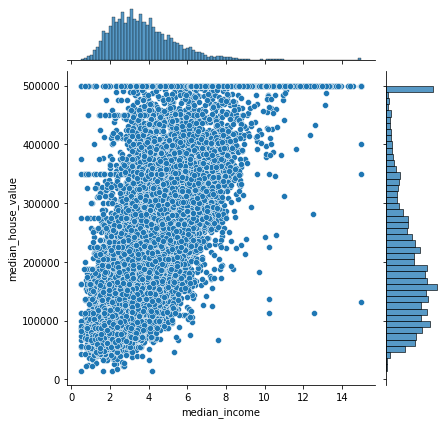

In [146]:
sns.jointplot(x='median_income', y='median_house_value', data=df)

8. __Create__ the following __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

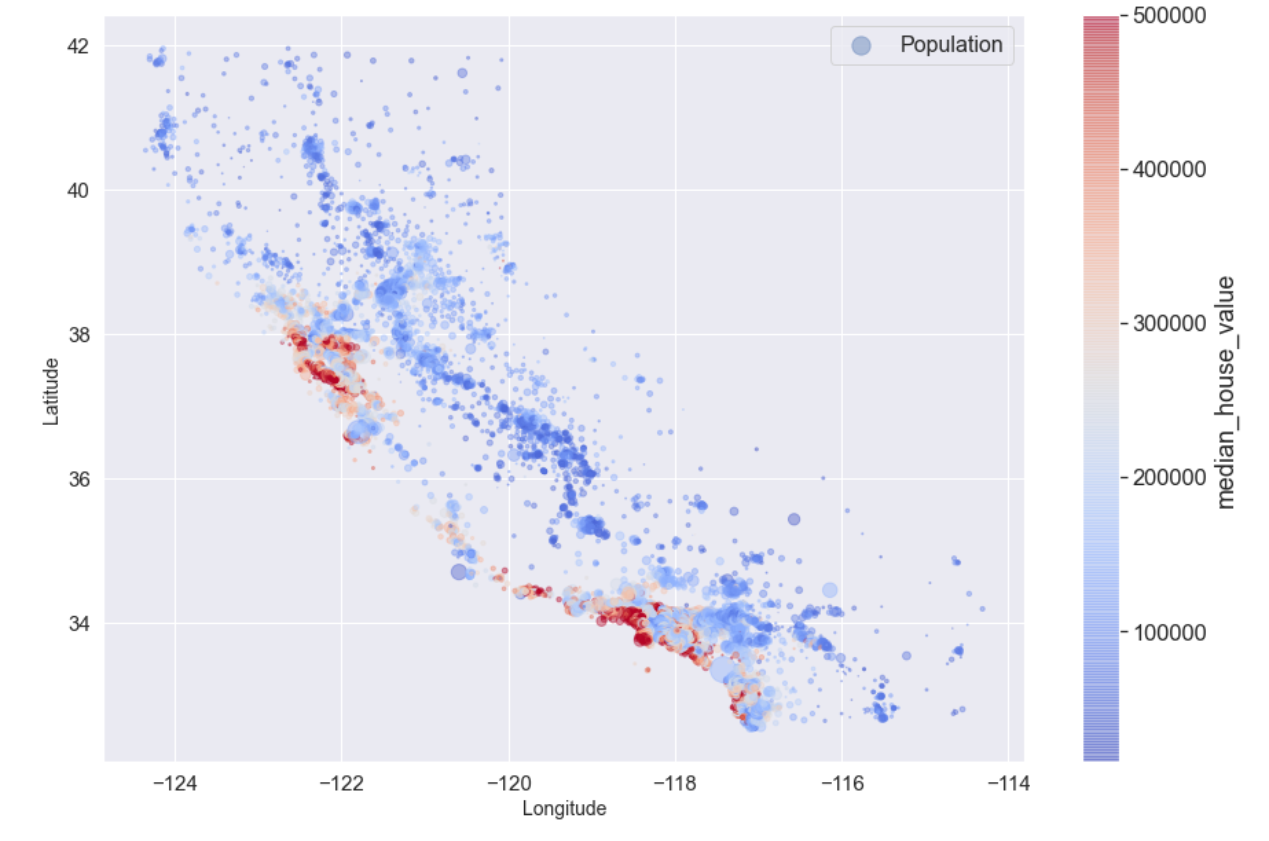

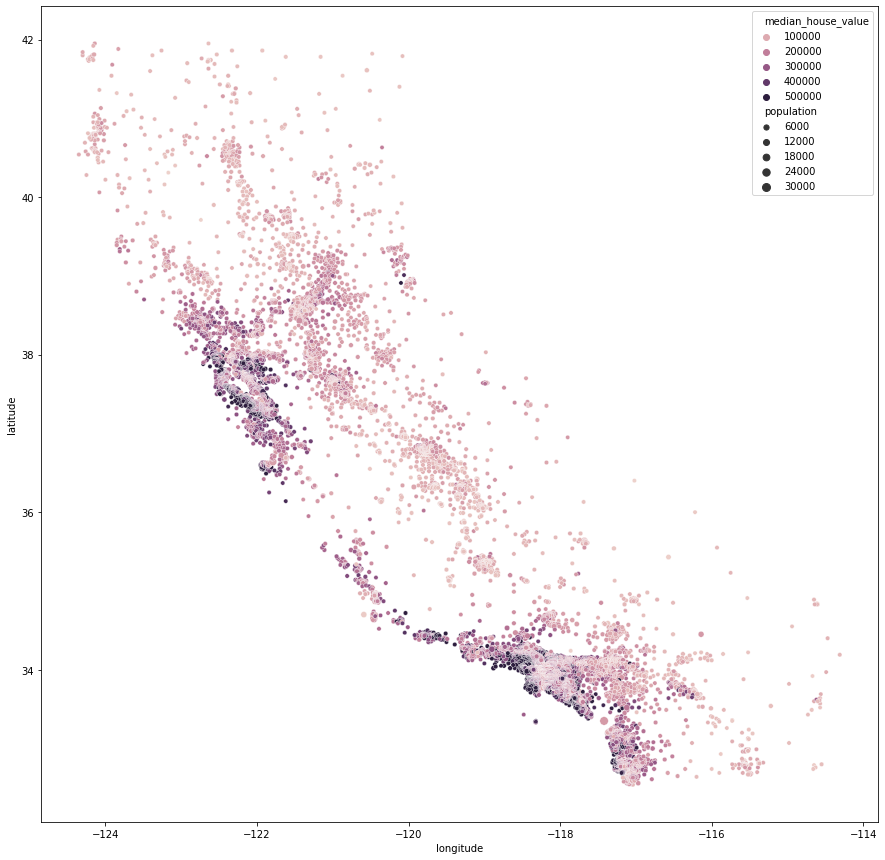

In [45]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='longitude', y='latitude', size='population', hue='median_house_value', data=df)
plt.show()

9. Does this look familiar to you? It´s California. Let´s __add the map__ of California saved in __california.png__.

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [148]:
# to standardize features we can use sts.zscore(df.median_income)
df['income_cat'] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1]
                           , labels=['low', 'below_avg', 'above_avg', 'high', 'very high'])

11. __Create__ (and interpret) the following Seaborn __Countplots__:

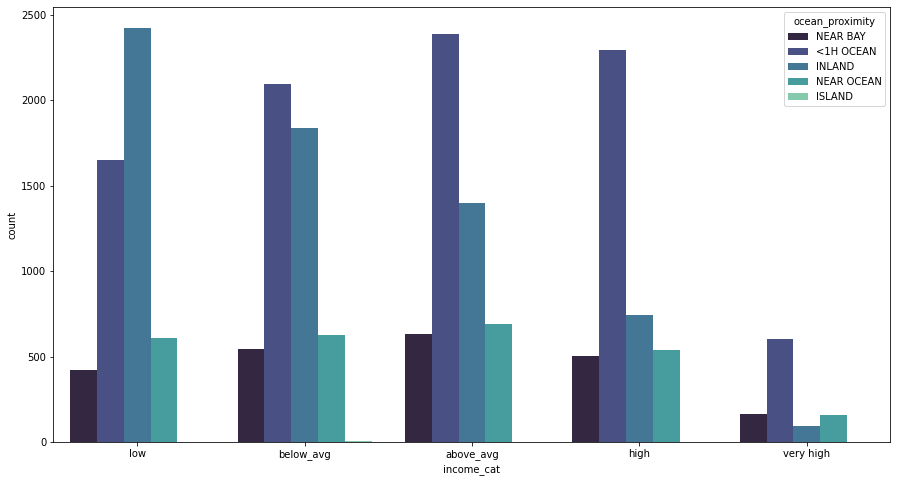

In [149]:
plt.figure(figsize=(15, 8))
sns.countplot(x='income_cat', data=df, hue='ocean_proximity', palette='mako')
plt.show()

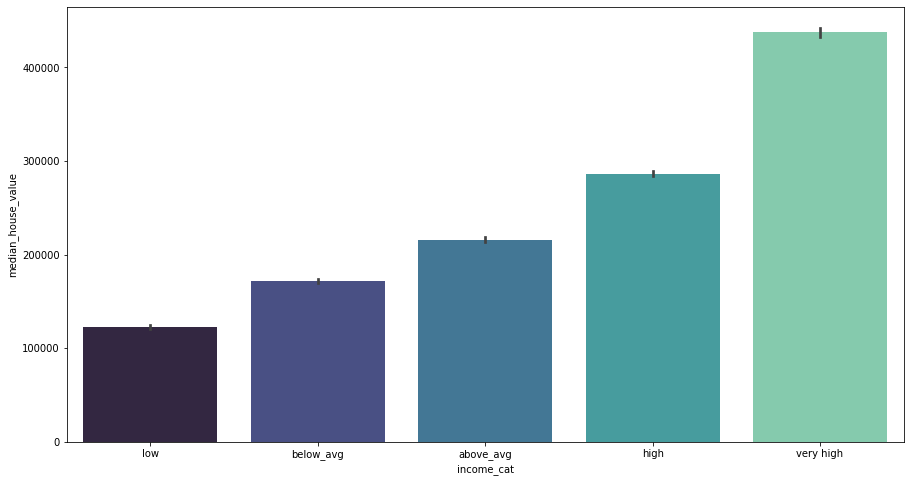

In [57]:
plt.figure(figsize=(15, 8))
sns.barplot(x='income_cat', y='median_house_value', data=df, palette='mako')
plt.show()

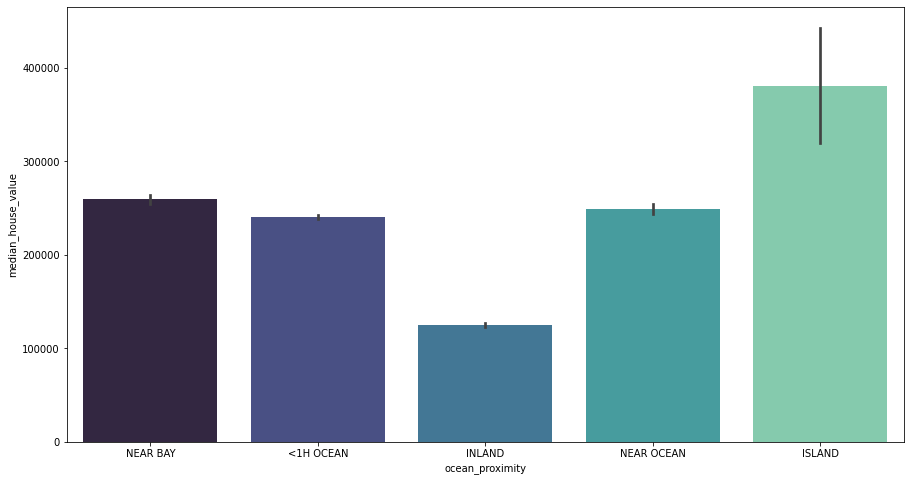

In [58]:
plt.figure(figsize=(15, 8))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df, palette='mako')
plt.show()

12. __Create__ (and interpret) the following Seaborn __Heatmap__ with mean house values for all combinations of income_cat & ocean_proximity:

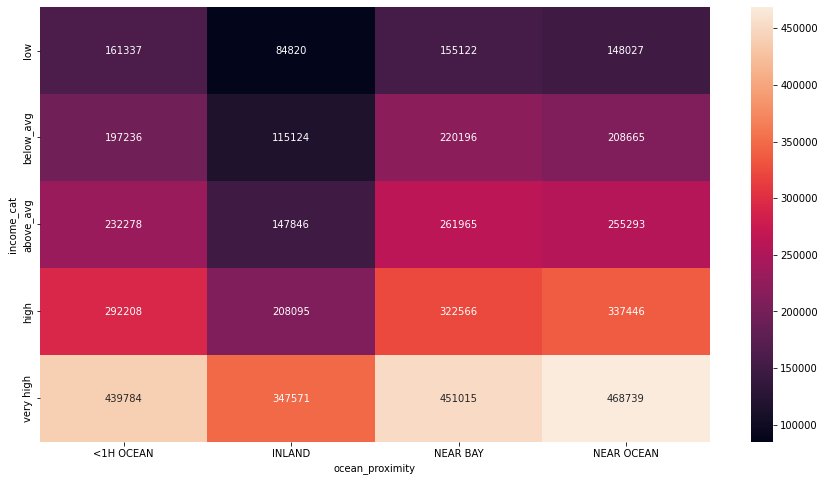

In [150]:
matrix = (df[['income_cat', 'ocean_proximity', 'median_house_value']]
          .groupby(['income_cat', 'ocean_proximity'])
          .mean()
          .unstack()
          .droplevel(0, axis=1))
matrix.dropna(axis=1, inplace=True)
plt.figure(figsize=(15, 8))
sns.heatmap(matrix, annot=matrix.astype(int).values, fmt='d')
plt.show()

## Machine Learning - Predicting House Values (optional)

Based on the Explanatory Data Analysis, <br>
- select an appropriate ML Model (e.g. Linear Regression or RandomForest Regression)
- split into Train and Test Set
- prepare/engineer Features
- Fit the Model (Train Set)
- Test the Model (Test Set)

In [262]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [151]:
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda x: x.replace(' ', '_').lower())

In [152]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1).drop('ocean_proximity', axis=1)
df = pd.concat([df, pd.get_dummies(df['income_cat'])], axis=1).drop('income_cat', axis=1)

In [172]:
X = df.loc[:, df.columns != 'median_income'].copy()
Y = df.loc[:,'median_income'].copy()

In [173]:
#standardize the numeric columns
numeric_columns = X.dtypes[X.dtypes=='float64'].index
X[numeric_columns] = sts.zscore(X[numeric_columns])

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=777)

In [263]:
rfrg = RandomForestRegressor(n_estimators=500
                             ,  max_features='sqrt'
                             , max_depth=75
                             , min_samples_split=2
                             , random_state=777)

In [264]:
rfrg.fit(x_train, y_train)
y_pred = rfrg.predict(x_test)

In [265]:
mean_absolute_error(y_test, y_pred)

0.3120713257096248

In [266]:
mean_absolute_percentage_error(y_test, y_pred)

0.09683662252259749

In [215]:
from xgboost import XGBRegressor

In [251]:
xgb = XGBRegressor(random_state=777, n_jobs=10)

In [255]:
searcher = GridSearchCV(xgb, {'n_estimators': range(50,101,10)
                              , 'booster': ['gbtree', 'gblinear', 'dart']
                              , 'reg_alpha': range(0, 6) }) #'max_depth': range(30, 101, 10)

In [232]:
x_train.rename({'<1h_ocean': '1h_ocean'}, axis=1, inplace=True)
x_test.rename({'<1h_ocean': '1h_ocean'}, axis=1, inplace=True)

In [256]:
searcher.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                        

In [267]:
searcher.best_params_

{'booster': 'dart', 'n_estimators': 50, 'reg_alpha': 4}

In [268]:
searcher.best_score_

0.9397021482274907

In [269]:
y_pred = searcher.predict(x_test)

In [271]:
mean_absolute_error(y_test, y_pred)

0.31377307118096903

In [272]:
mean_absolute_percentage_error(y_test, y_pred)

0.09619643502447141